<a href="https://colab.research.google.com/github/PunithKumarR/takehome_user_assignment/blob/main/Takehome_user_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import sys

import datetime
import pandas as pd
from google.colab import files
import io

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_context('talk')

from collections import defaultdict

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

Populating the interactive namespace from numpy and matplotlib


In [18]:
uploaded=files.upload()
users = pd.read_csv(io.BytesIO(uploaded['takehome_users1.csv']))


Saving takehome_users1.csv to takehome_users1 (2).csv


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [21]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [12]:
uploaded_files=files.upload()
user_summ = pd.read_csv(io.BytesIO(uploaded_files['takehome_user_engagement.csv']))

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [22]:
user_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [23]:

user_summ['time_stamp'] = pd.to_datetime(user_summ['time_stamp'])

In [24]:
user_summ.sort_values(by = 'time_stamp', inplace = True)
user_summ.reset_index(inplace = True, drop = True)

In [25]:
user_summ.head()

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1


In [26]:
visits_by_user = user_summ.groupby('user_id').sum()

In [27]:
def total_visits(row, df):
    user = row['user_id']
    return df.loc[user].visited

In [29]:
%%time 
user_summ['ttl_visits'] = user_summ.apply(total_visits, df = visits_by_user, axis = 1)

CPU times: user 28.1 s, sys: 92.5 ms, total: 28.2 s
Wall time: 32.3 s


In [30]:
user_summ.head()

,time_stamp,user_id,visited,ttl_visits
0,2012-05-31 08:20:06,10012,1,1
1,2012-05-31 15:47:36,3428,1,14
2,2012-05-31 17:19:37,9899,1,1
3,2012-05-31 21:58:33,1693,1,289
4,2012-06-01 00:17:30,6102,1,2


In [31]:
active = defaultdict(lambda: 0)

In [38]:
%%time
for i in np.arange(len(user_summ)):
    wk = pd.to_timedelta('7D') 
    
    
    dates = user_summ[user_summ.user_id ==user_summ.iloc[i].user_id].time_stamp.values
    
    
    if active[user_summ.iloc[i].user_id] >0 : continue
    
    
    for date in np.arange(len(dates)):
        count = 0  
      
        rng = pd.date_range(start = dates[date], end = pd.to_datetime(dates[date])+wk)
        
        for date in dates:
            if date in rng:
                count +=1
        if count >= 3:
            active[user_summ.iloc[i].user_id] = 1 

CPU times: user 4min 24s, sys: 652 ms, total: 4min 25s
Wall time: 4min 25s


In [33]:
active_users = user_summ[user_summ.ttl_visits >=3]

In [39]:
def active_users_(x):
   
    if int(x) in active.keys(): 
        return pd.Series(int(x)).replace(active)[0]

def invited(x):
   
    if x.endswith('INVITE') or x.endswith('JECTS'):
        return 1 
    else:
        return 0 

def org_size(x):
   
    if x in np.asarray(users.org_id.unique()):
        return pd.Series(int(x)).replace(org_n)[0] 
    else:
        return 0 

In [35]:
org_n = users.org_id.value_counts().to_dict()

In [54]:
%%time
users['active'] = users.object_id.apply(active_users_)
users.fillna(value={'active': 0}, inplace = True) 

CPU times: user 39min 36s, sys: 5.55 s, total: 39min 41s
Wall time: 39min 44s


In [55]:
users.active.value_counts()


0.0    10344
1.0     1656
Name: active, dtype: int64

In [56]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [57]:
%%time


users['day'] = [datetime.datetime.strftime(pd.to_datetime(x), "%a") 
                for x in users.creation_time.values]

users['month'] = [datetime.datetime.strftime(pd.to_datetime(x), "%b") 
                  for x in users.creation_time.values]

users['week_n'] = [datetime.datetime.strftime(pd.to_datetime(x), "%U") 
                   for x in users.creation_time.values]

CPU times: user 2.09 s, sys: 3.98 ms, total: 2.09 s
Wall time: 2.1 s


In [58]:
%%time
users['invited'] = users.creation_source.apply(invited)

CPU times: user 10.1 ms, sys: 1 µs, total: 10.1 ms
Wall time: 10.3 ms


In [59]:
%%time
users['org_size'] = users.org_id.apply(org_size)

CPU times: user 2min 36s, sys: 361 ms, total: 2min 37s
Wall time: 2min 37s


In [47]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


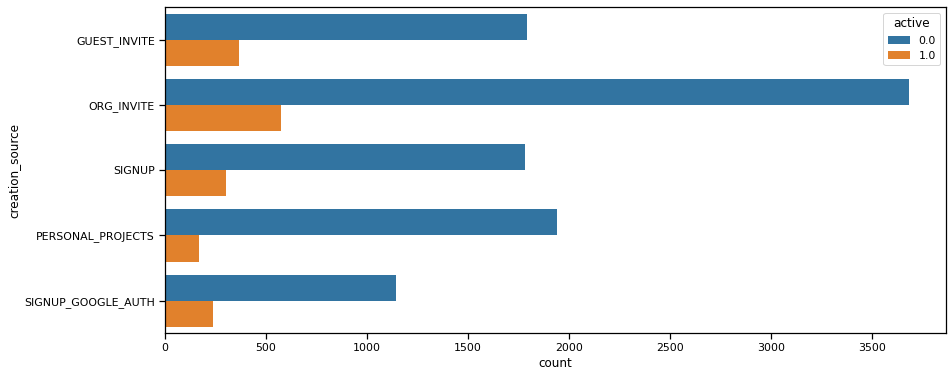

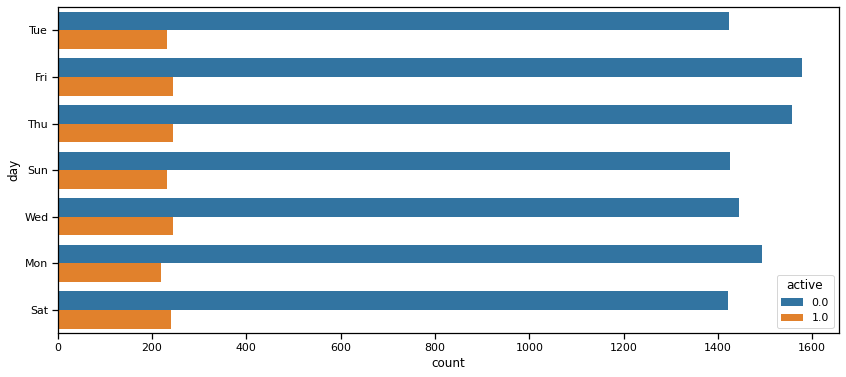

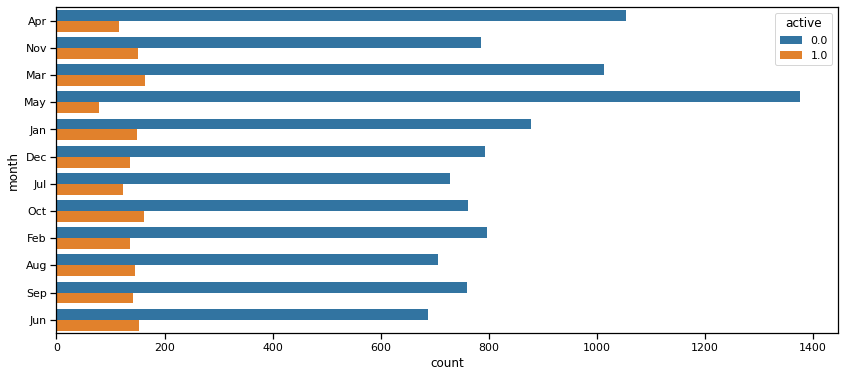

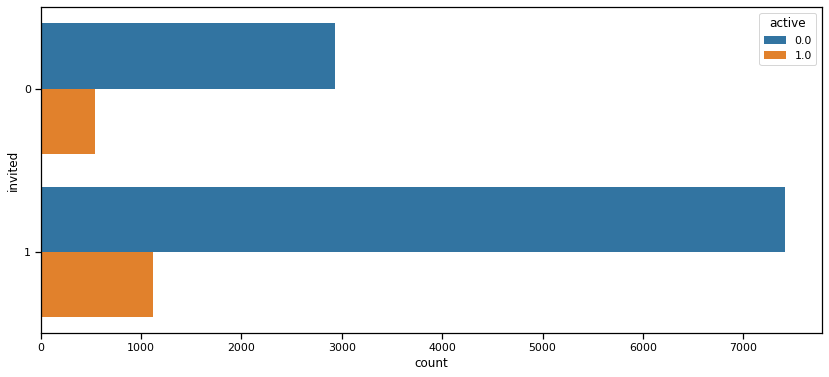

In [60]:
for col in ['creation_source','day', 'month', 'invited']:
    sns.countplot(y = col, hue = 'active', data = users )
    plt.show()

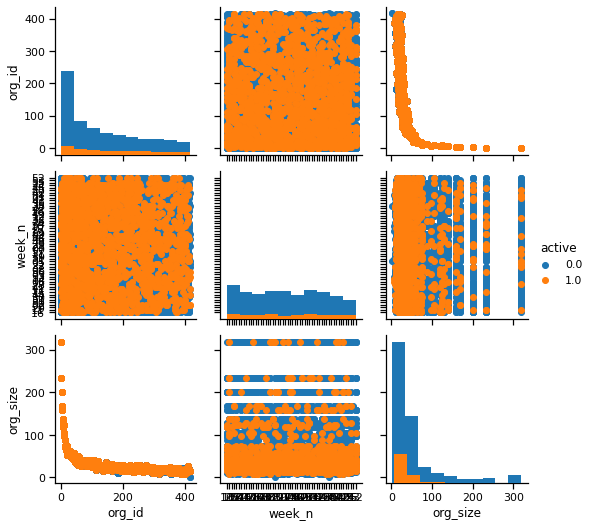

In [61]:
sns.set_context('notebook')
p = sns.PairGrid(users,
                 x_vars = ['org_id','week_n', 'org_size'],
                 y_vars = ['org_id','week_n', 'org_size'],
                 hue = 'active'
                )
p = p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)
p.add_legend()

In [62]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=None):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [63]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,day,month,week_n,invited,active,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Tue,Apr,16,1,0.0,75
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Fri,Nov,45,1,1.0,233
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Tue,Mar,11,1,0.0,32
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Tue,May,20,1,0.0,233
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Thu,Jan,02,1,0.0,16


In [64]:
df = users.drop(['object_id', 'creation_time', 'name', 
                       'email', 'last_session_creation_time', 
                       'org_id','invited_by_user_id'], axis =1)
df = pd.get_dummies(df, columns = ['day','month','week_n','creation_source'] )
df_cor = get_top_abs_correlations(df)

In [65]:
df_cor = pd.DataFrame(df_cor).reset_index()
df_cor.rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0:"correlation"}, 
           inplace = True)
df_cor = df_cor[(df_cor.feature_1 == 'active') | 
          (df_cor.feature_2 == 'active')].reset_index(drop = True)[0:10]

print("Top 10 Absolute Correlations")
df_cor

Top 10 Absolute Correlations


,feature_1,feature_2,correlation
0,active,month_May,0.090890
1,active,org_size,0.083936
2,active,creation_source_PERSONAL_PROJECTS,0.075717
3,active,week_n_21,0.053894
4,active,week_n_20,0.045975
5,active,creation_source_GUEST_INVITE,0.044317
6,active,week_n_19,0.041150
7,active,month_Apr,0.037744
8,active,creation_source_SIGNUP_GOOGLE_AUTH,0.036198
9,active,month_Jun,0.034964


In [66]:
users_df = users.drop(['object_id', 'creation_time', 'name', 
                       'email', 'last_session_creation_time', 
                       'org_id','invited_by_user_id','active' ], axis =1)

In [67]:
X = pd.get_dummies(users_df, columns = ['day','month','week_n','creation_source'] )
y = users.active.values

In [68]:
print(y.shape)
print(X.shape)

(12000,)
(12000, 82)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 5, stratify = y)

pipeline = imbPipeline([('sm', SMOTE(random_state = 5,
                                     sampling_strategy = 'not majority')),
               ('clf', GradientBoostingClassifier())
              ])


parameters = [
    {'clf': [GradientBoostingClassifier()],
    'clf__n_estimators': [150, 200],
    'clf__max_depth': [2, 3],
    'clf__min_samples_split': [50]}
]


cv = GridSearchCV(pipeline,
                  param_grid=parameters,
                  refit = True,
                  cv = 5,
                  scoring = 'precision', 
                  verbose = True,
                  n_jobs = -1)


cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sm',
                                        SMOTE(random_state=5,
                                              sampling_strategy='not '
                                                                'majority')),
                                       ('clf', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [GradientBoostingClassifier(min_samples_split=50,
                                                             n_estimators=200)],
                          'clf__max_depth': [2, 3],
                          'clf__min_samples_split': [50],
                          'clf__n_estimators': [150, 200]}],
             scoring='precision', verbose=True)

In [72]:
cv.best_params_

{'clf': GradientBoostingClassifier(min_samples_split=50, n_estimators=200),
 'clf__max_depth': 3,
 'clf__min_samples_split': 50,
 'clf__n_estimators': 200}

In [73]:
y_pred = cv.predict(X_test)

In [74]:
y_predict_proba = cv.predict_proba(X_test)[:,1]

In [75]:
prec_score = cv.score(X_test, y_test)
roc_auc = roc_auc_score(y_test, y_predict_proba)

print('The precision score is: {}'.format(prec_score))
print('The AUC score is: {}'.format(roc_auc))



print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The precision score is: 0.21678321678321677
The AUC score is: 0.6265625935438841
[[1957  112]
 [ 300   31]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      2069
         1.0       0.22      0.09      0.13       331

    accuracy                           0.83      2400
   macro avg       0.54      0.52      0.52      2400
weighted avg       0.78      0.83      0.80      2400



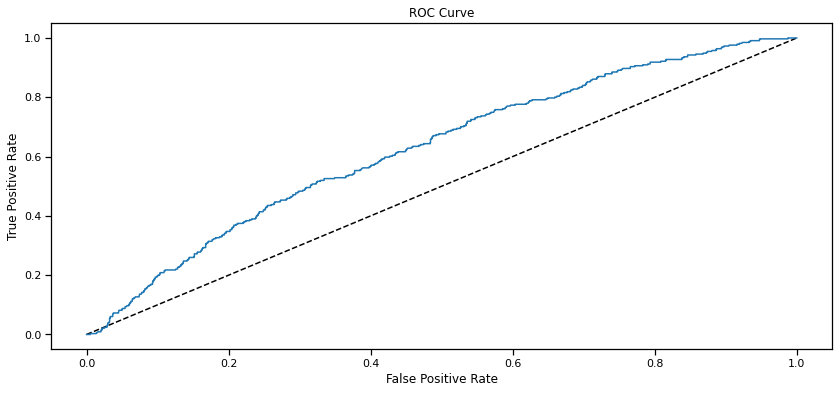

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)


_=plt.plot([0, 1], [0, 1], 'k--')
_=plt.plot(fpr, tpr)
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
plt.show()

In [77]:
fi = cv.best_estimator_.steps[1][1].feature_importances_

feature_importances = pd.DataFrame(fi,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(5)

,importance
month_May,0.088782
org_size,0.077617
creation_source_PERSONAL_PROJECTS,0.057138
month_Apr,0.055604
day_Thu,0.050643


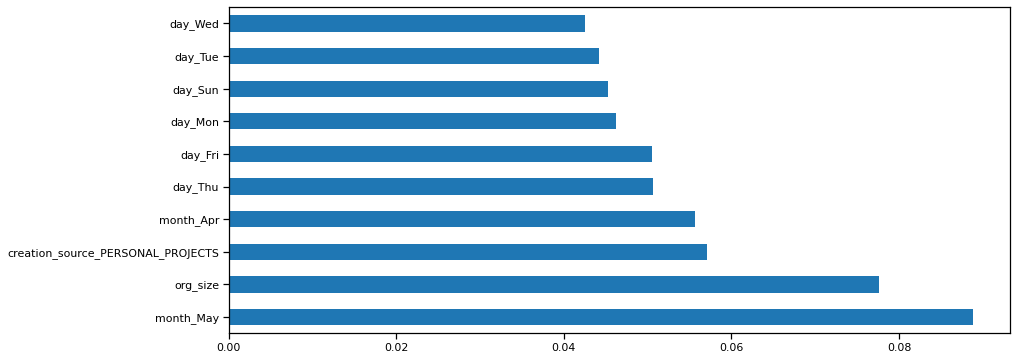

In [78]:
feat_importances = pd.Series(cv.best_estimator_.steps[1][1].feature_importances_,
                             index=X.columns)

feat_importances.nlargest(10).plot(kind='barh')

plt.show()